In [55]:
import numpy as np     #只需要下载numpy库即可
import random
import GridWorld_v2

In [56]:
gamma = 0.9   #折扣因子，越接近0越近视

rows = 5      #记得行数和列数这里要同步改
columns = 5
# gridworld = GridWorld_v2.GridWorld_v2(rows=rows, columns=columns, forbiddenAreaNums=8, targetNums=2, seed = 52,forbiddenAreaScore=-10)
# gridworld = GridWorld_v2.GridWorld_v2(desc = [".#",".T"])             #赵老师4-1的例子
# gridworld = GridWorld_v2.GridWorld_v2(desc = ["##.T","...#","...."])  #随便弄的例子
gridworld = GridWorld_v2.GridWorld_v2(forbiddenAreaScore=-1, score=1,desc = [".....",".##..","..#..",".#T#.",".#..."]) 
gridworld.show()

trajectorySteps = 1000

value = np.zeros(rows*columns)       #初始化可以任意，也可以全0
qtable = np.zeros((rows*columns,5))  #初始化，这里主要是初始化维数，里面的内容会被覆盖所以无所谓

# np.random.seed(50)
# policy = np.eye(5)[np.random.randint(0,5,size=(rows*columns))] 
policy = 0.2 * np.ones((rows*columns,5))
print(gridworld.showPolicy)
gridworld.showPolicy(policy)

⬜️⬜️⬜️⬜️⬜️
⬜️🚫🚫⬜️⬜️
⬜️⬜️🚫⬜️⬜️
⬜️🚫✅🚫⬜️
⬜️🚫⬜️⬜️⬜️
<bound method GridWorld_v2.showPolicy of <GridWorld_v2.GridWorld_v2 object at 0x000001CFC5CA6B80>>
⬆️⬆️⬆️⬆️⬆️
⬆️⏫️⏫️⬆️⬆️
⬆️⬆️⏫️⬆️⬆️
⬆️⏫️✅⏫️⬆️
⬆️⏫️⬆️⬆️⬆️


In [57]:
policy

array([[0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2]])

In [58]:
#policy evaluation
value = np.zeros(rows*columns)
value0 = value.copy()+1  
for i in range(1000):
    value0 = value.copy()
    for i in range(rows * columns):   #使用当前策略policy，计算每个state的value，进行迭代
        value[i] = 0
        for j in range(0,5):
            score, nextState = gridworld.getScore(i,j)   #返回得分以及下一步的state id
            value[i] += policy[i][j] * (score + value0[nextState] * gamma) #贝尔曼迭代
value = np.array(value).reshape(rows,columns)

In [59]:
true_value = value

In [71]:
true_value

array([[-3.84634877, -3.8137695 , -3.64424121, -3.12093595, -3.23501308],
       [-3.79356623, -3.84725715, -3.80037441, -3.10629577, -2.92409746],
       [-3.57240735, -3.8964613 , -3.3816893 , -3.19438401, -2.94437102],
       [-3.90075416, -3.61585878, -3.40314265, -2.8976155 , -3.23928216],
       [-4.45885977, -4.16077636, -3.3858196 , -3.36343957, -3.45323894]])

In [60]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

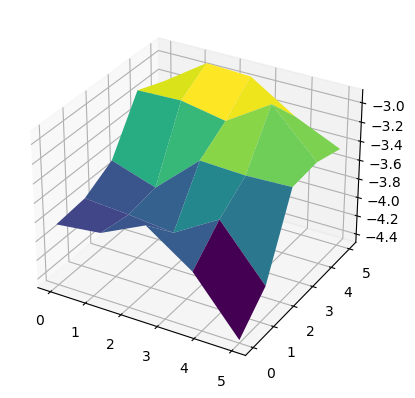

In [61]:
x = np.linspace(0,5,5)
y = np.linspace(0,5,5)

X, Y = np.meshgrid(x,y)

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.plot_surface(Y,X,value, cmap='viridis')

#### Pseudocode: TD learning with function Approximation
**Initialzation**: A function $ \hat{v}(s,w)$ that is a differentiable in $w$. Initial parameter $w_0$.

**Aim**: Approximate the true state values of a given policy $\pi$


For each episode generated following the policy $\pi$, do

&ensp; &ensp;&ensp; &ensp; For each step($s_t$,$r_{t+1}$,$s_{t+1}$),do

&ensp; &ensp;&ensp; &ensp;&ensp; &ensp;&ensp; &ensp; In the general case.

&ensp; &ensp;&ensp; &ensp;&ensp; &ensp;&ensp; &ensp; $w_{t+1} = w_t + \alpha_t[r_{t+1}+\gamma \hat{v}(s_{t+1},w_t)- \hat{v}(s_{t},w_t)]\nabla_w\hat{v}(s_t,w_t)$


我们拥有**500**条长度为**500**的episode，去拟合这个东东，进行policy evaluation

In [62]:
episodes = [gridworld.getTrajectoryScore(nowState = random.randint(0,24),action = random.randint(0,4),policy = policy,steps = 500) 
            for i in range(500)]

In [63]:
print(len(episodes))
print(len(episodes[0]))

500
501


In [64]:
grad = lambda x,y: np.array([1, x, y, x**2, y**2, x*y])
w = np.array([0.0,0.0,0.0,0.0,0.0,0.0])

In [10]:
grad(1,2)

array([1, 1, 2, 1, 4, 2])

In [11]:
grad(1,2) @ w

0.0

In [72]:
true_value[0][0]

-3.8463487651333716

In [95]:
def draw(grad,w):
    x = np.linspace(0,5,5)
    y = np.linspace(0,5,5)
    value = np.zeros((5,5))
    for i in range(5):
        for j in range(5):
            value[i][j] = grad(i,j) @ w
    fig = plt.figure()
    ax = fig.add_subplot(111, projection = '3d')
    ax.plot_surface(Y,X,value, cmap='viridis')
    plt.show()
    
def TD_Learning_use_true_value(grad, w, learning_rate,epochs=10):
    g = 1
    cnt = 0
    while(math.fabs(g)>0.01):
        
        for i in range(500):
            for trajectory in episodes[i]:
                tmpstate, tmpaction, tmpscore, nextState, nextAction  = trajectory
                #注意这里跟第七章的sarsa符号相反了
                nowX, nowY, nextX, nextY = tmpstate//5,tmpstate%5,nextState//5,nextState%5

                error = true_value[nowX][nowY] - grad(nowX,nowY) @ w
                w += learning_rate * error * grad(nowX,nowY)

        g = error * grad(nowX,nowY).sum()
        print(f"{cnt}/{epochs}","grad =",error * grad(nowX,nowY).sum())
        # print(f"w={w}")
        # print(f"grad={TD_error * grad(nowX,nowY)}")
        if(cnt % 10==0):
            draw(grad,w)
        cnt += 1
        if cnt >=epochs:
            break
    return w
    
def TD_Learning_use_TD_error(grad, w, learning_rate,epochs=10):
    g = 1
    cnt = 0
    while(math.fabs(g)>0.01):
        
        for i in range(500):
            for trajectory in episodes[i]:
                tmpstate, tmpaction, tmpscore, nextState, nextAction  = trajectory
                #注意这里跟第七章的sarsa符号相反了
                nowX, nowY, nextX, nextY = tmpstate//5,tmpstate%5,nextState//5,nextState%5
                TD_error = (tmpscore + gamma * grad(nextX,nextY) @ w) - grad(nowX,nowY) @ w
                w += learning_rate * TD_error * grad(nowX,nowY)

        print(f"{cnt}/{epochs}","grad =",TD_error * grad(nowX,nowY).sum())
        g = TD_error * grad(nowX,nowY).sum()
        # print(f"w={w}")
        # print(f"grad={TD_error * grad(nowX,nowY)}")
        if(cnt % 10==0):
            draw(grad,w)
        cnt += 1
        if cnt >=epochs:
            break
            
    return w

0/10 grad = -2.9197712536440523


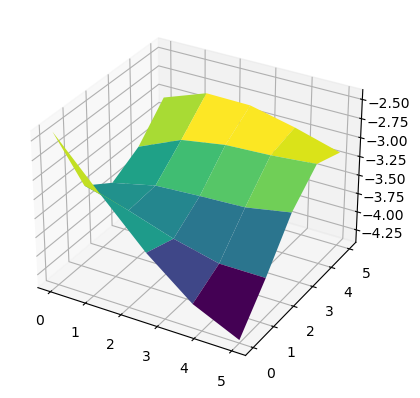

1/10 grad = 0.8462441655176578
2/10 grad = 1.7019109196538063
3/10 grad = 1.8065752723320694
4/10 grad = 1.6927736109360447
5/10 grad = 1.5267839595868038
6/10 grad = 1.3614145209380402
7/10 grad = 1.2119427890173684
8/10 grad = 1.0813027900357586
9/10 grad = 0.9685595413989123


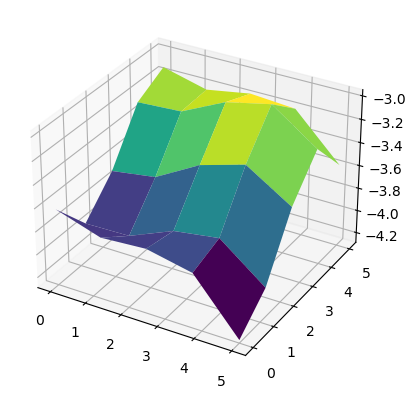

In [97]:
import math
grad = lambda x,y: np.array([1, x, y, x**2, y**2, x*y, x**3, y**3,x*x*y,x*y*y])
# w = np.array([0.0,0.0,0.0, 0.0,0.0,0.0, 0.0,0.0,0.0,0.0])
np.random.seed(1)
w = np.random.randn(10)
w = TD_Learning_use_true_value(grad=grad, w = w, learning_rate = 0.00005)
draw(grad=grad, w = w)

0/30 grad = -6.387933188919954


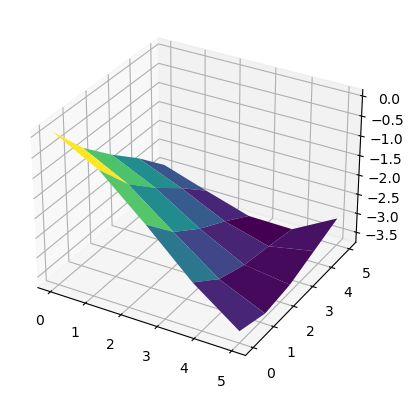

1/30 grad = -2.765204005104729
2/30 grad = -0.47190331258834206
3/30 grad = 1.1663022550304003
4/30 grad = 2.3449732533570833
5/30 grad = 3.1943722121177753
6/30 grad = 3.8072289408782245
7/30 grad = 4.2499833172055945
8/30 grad = 4.570328250047209
9/30 grad = 4.802528449037946
10/30 grad = 4.971213025589263


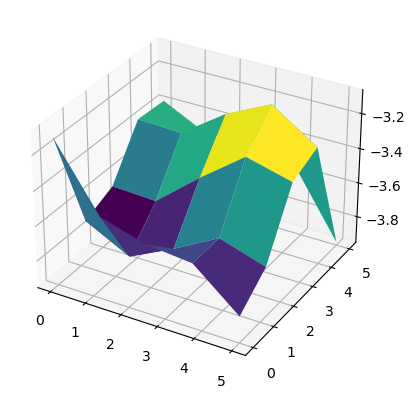

11/30 grad = 5.09409149611777
12/30 grad = 5.183902294116898
13/30 grad = 5.249811745801676
14/30 grad = 5.298418845685786
15/30 grad = 5.334477040715706
16/30 grad = 5.3614127899113795
17/30 grad = 5.3816981593870405
18/30 grad = 5.397118569931538
19/30 grad = 5.40896522697659
20/30 grad = 5.418173442447949


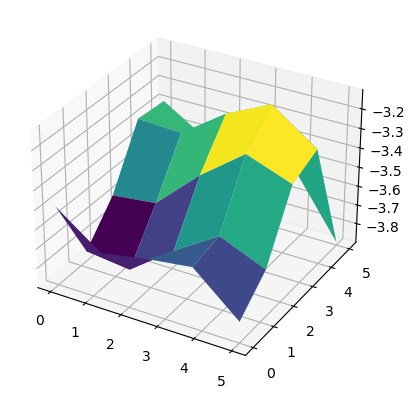

21/30 grad = 5.425422082680895
22/30 grad = 5.431205085095456
23/30 grad = 5.435882904043732
24/30 grad = 5.4397195323980485
25/30 grad = 5.442909155336886
26/30 grad = 5.445595350633985
27/30 grad = 5.447884929354494
28/30 grad = 5.449857921546708
29/30 grad = 5.451574788196183


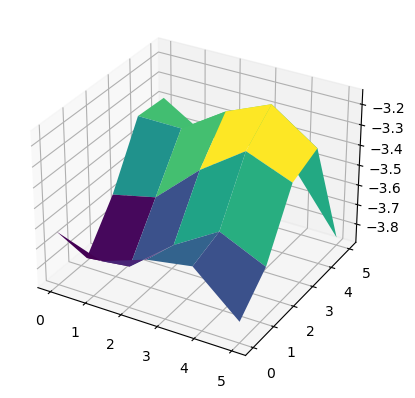

In [100]:
import math
grad = lambda x,y: np.array([1, x, y, x**2, y**2, x*y, x**3, y**3,x*x*y,x*y*y])
# w = np.array([0.0,0.0,0.0, 0.0,0.0,0.0, 0.0,0.0,0.0,0.0])
np.random.seed(1)
w = np.random.randn(10)
w = TD_Learning_use_TD_error(grad=grad, w = w, learning_rate = 0.00005, epochs=30)
draw(grad=grad, w = w)

In [ ]:
grad = lambda x,y: np.array([1, x, y, x**2, y**2, x*y])
w = np.array([0.0,0.0,0.0,0.0,0.0,0.0])
w = TD_Learning(grad=grad, w = w, learning_rate = 0.001)
draw(grad=grad, w = w)

0/10 grad = 10.109875495758503
1/10 grad = 10.109875495758503
2/10 grad = 10.109875495758503
3/10 grad = 10.109875495758503
4/10 grad = 10.109875495758503
5/10 grad = 10.109875495758503
6/10 grad = 10.109875495758503
7/10 grad = 10.109875495758503
8/10 grad = 10.109875495758503
9/10 grad = 10.109875495758503


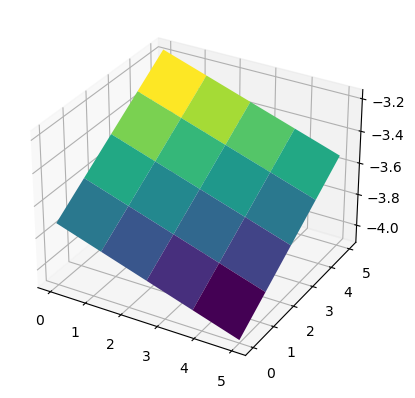

In [49]:
grad = lambda x,y: np.array([1, x, y])
w = np.array([0.0,0.0,0.0])
w = TD_Learning(grad=grad, w = w, learning_rate = 0.01)
draw(grad=grad, w = w)